# Fast.ai Deep Learning Lesson 1: Cats vs Dogs

[Link](https://course.fast.ai/lessons/lesson1.html)

Note that in order to follow the video tutorial, you need to pip install version 0.7.0 of fastai. The latest version will not work with the tutorial methodology. 

In [1]:
# fast ai installations
!pip install fastai==0.7.0
!pip install torchtext==0.2.3

    100% |████████████████████████████████| 122kB 4.6MB/s 
    100% |████████████████████████████████| 71kB 23.3MB/s 
    100% |████████████████████████████████| 3.6MB 10.0MB/s 
    100% |████████████████████████████████| 1.5MB 9.7MB/s 
    100% |████████████████████████████████| 184kB 28.4MB/s 
    100% |████████████████████████████████| 496.4MB 37kB/s 
    100% |████████████████████████████████| 61kB 20.9MB/s 
    100% |████████████████████████████████| 11.6MB 3.2MB/s 
    100% |████████████████████████████████| 61kB 20.7MB/s 
    100% |████████████████████████████████| 92kB 26.7MB/s 
    100% |████████████████████████████████| 81kB 25.5MB/s 
  Running setup.py bdist_wheel for feather-format ... - done
  Stored in directory: /root/.cache/pip/wheels/85/7d/12/2dfa5c0195f921ac935f5e8f27deada74972edc0ae9988a9c1
  Running setup.py bdist_wheel for bcolz ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - 

In [0]:
import fastai
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [0]:
# suppress scientific notation, round to 4 decimals
np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:0.4f}'.format})

# Download Images

In [0]:
# I have commented this out for better appearance on Github; need to uncomment out code below to get images
# !wget http://files.fast.ai/data/dogscats.zip && unzip dogscats.zip -d data/

# View Image Files

In [5]:
# bash command for our download folder
!ls data/dogscats

models	sample	test1  train  valid


In [0]:
PATH = "data/dogscats/"
sz=224

In [7]:
!ls {PATH}

models	sample	test1  train  valid


In [8]:
!ls {PATH}valid

cats  dogs


In [9]:
# show first 10 file names
files = !ls {PATH}valid/cats | head
files

['cat.10016.jpg',
 'cat.1001.jpg',
 'cat.10026.jpg',
 'cat.10048.jpg',
 'cat.10050.jpg',
 'cat.10064.jpg',
 'cat.10071.jpg',
 'cat.10091.jpg',
 'cat.10103.jpg',
 'cat.10104.jpg']

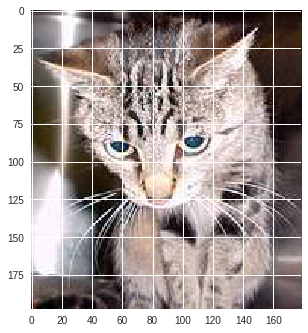

In [12]:
img = plt.imread(f'{PATH}valid/cats/{files[0]}')
plt.imshow(img)

In [13]:
img.shape

(198, 179, 3)

In [14]:
img[:4,:4]

array([[[ 29,  20,  23],
        [ 31,  22,  25],
        [ 34,  25,  28],
        [ 37,  28,  31]],

       [[ 60,  51,  54],
        [ 58,  49,  52],
        [ 56,  47,  50],
        [ 55,  46,  49]],

       [[ 93,  84,  87],
        [ 89,  80,  83],
        [ 85,  76,  79],
        [ 81,  72,  75]],

       [[104,  95,  98],
        [103,  94,  97],
        [102,  93,  96],
        [102,  93,  96]]], dtype=uint8)

# Building First Model

In [0]:
!rm -rf {PATH}tmp

In [16]:
# train model using resnet34
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)

# learn.fit(learning rate, # of epochs)
learn.fit(0.01,3)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:05<00:00, 16380421.61it/s]


100%|██████████| 32/32 [00:15<00:00,  4.24it/s]


epoch      trn_loss   val_loss   accuracy   
    0      0.05072    0.025019   0.9915    
    1      0.03493    0.023684   0.99      
    2      0.042501   0.025127   0.9895    



[array([0.02513]), 0.9895]

# Analyzing Results

In [18]:
# 0 = cats, 1 = dogs
data.val_y

array([0, 0, 0, ..., 1, 1, 1])

In [19]:
data.classes

['cats', 'dogs']

In [134]:
# prediction for validation set in log scale
log_preds = learn.predict()
log_preds.shape

(2000, 2)

In [123]:
# first 10 predictions
log_preds[:10]

array([[-0.0000, -10.6050],
       [-0.0041, -5.4886],
       [-0.0000, -11.0419],
       [-0.0000, -11.5400],
       [-0.0016, -6.4404],
       [-0.0093, -4.6841],
       [-0.0000, -11.0331],
       [-0.0000, -10.4782],
       [-0.0005, -7.5491],
       [-0.0001, -9.6720]], dtype=float32)

In [135]:
# since our probabilities are in log, we need to convert
preds = np.argmax(log_preds, axis=1) # from log probabilities to 0 or 1
print(preds.shape)

# probabilities; suppress scientific notation with rounding function
probs = np.around(np.exp(log_preds[:,1]), decimals=4)
print(probs.shape)

(2000,)
(2000,)


In [0]:
def rand_by_mask(mask): 
  return np.random.choice(np.where(mask)[0], 8, replace=False)

In [0]:
def rand_by_correct(is_correct):
  return rand_by_mask((preds == data.val_y)==is_correct)

In [0]:
def plot_val_with_title(idxs, title):
  imgs = np.stack([data.val_ds[x][0] for x in idxs])
  title_probs = [probs[x] for x in idxs]
  print(title)
  return plots(data.val_ds_denorm(imgs), rows=1, titles=title_probs)

In [0]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
  f = plt.figure(figsize=figsize)
  for i in range(len(ims)):
    sp = f.add_subplot(rows, len(ims)//rows, i+1)
    sp.axis('Off')
    if titles is not None: sp.set_title(titles[i], fontsize=16)
    plt.imshow(ims[i])

In [0]:
def load_img_id(ds, idx): 
  return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

In [0]:
def plot_val_with_title(idxs, title):
  imgs = [load_img_id(data.val_ds,x) for x in idxs]
  title_probs = [probs[x] for x in idxs]
  print(title)
  return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

correctly classified


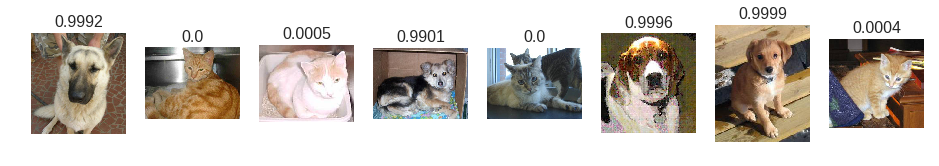

In [54]:
# a few correct labels at random
plot_val_with_title(rand_by_correct(True), "correctly classified")

Incorrectly Classified


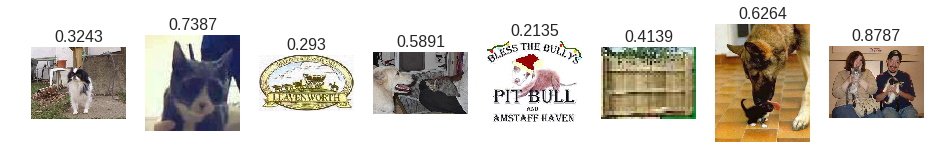

In [55]:
# incorrect labels at random
plot_val_with_title(rand_by_correct(False), "Incorrectly Classified")

In [0]:
def most_by_mask(mask, mult):
  idxs = np.where(mask)[0]
  return idxs[np.argsort(mult * probs[idxs])[:5]]

In [0]:
def most_by_correct(y, is_correct):
  mult = -1 if (y==1)==is_correct else 1
  return most_by_mask((preds == data.val_y)==is_correct & (data.val_y == y), mult)

Most correct cats


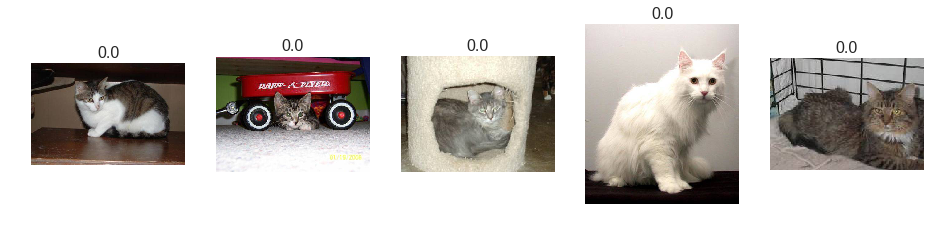

In [69]:
# show images that we are most confident are cats
plot_val_with_title(most_by_correct(0, True), "Most correct cats")

Most correct dogs


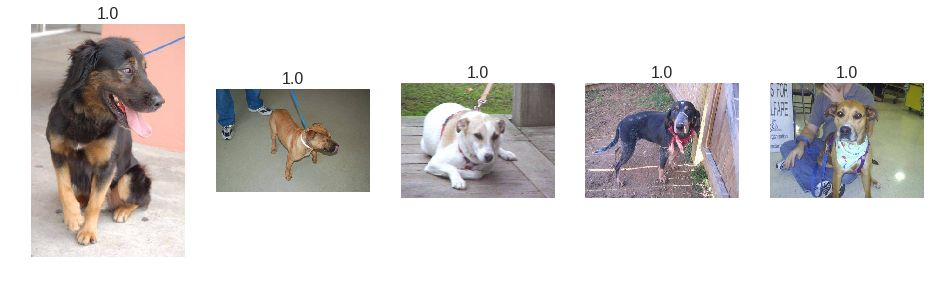

In [70]:
# most confident dog predictions
plot_val_with_title(most_by_correct(1, True), "Most correct dogs")

Most incorrect cats


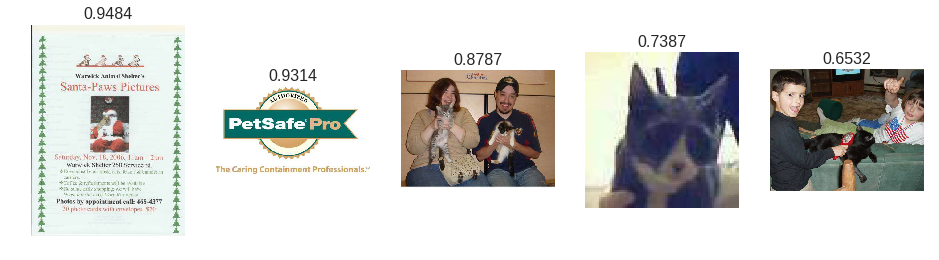

In [71]:
# which cats is the model "most confident" are "dogs"
plot_val_with_title(most_by_correct(0, False), "Most incorrect cats")

Most incorrect dogs


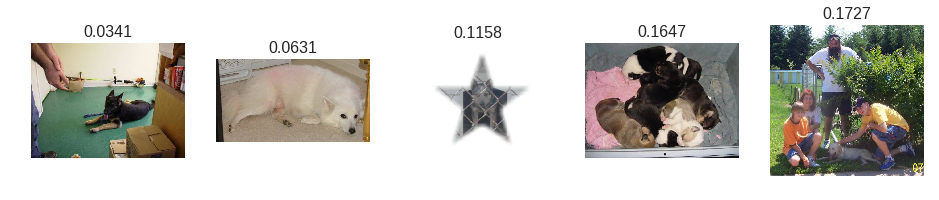

In [72]:
# most incorrectly classified dogs
plot_val_with_title(most_by_correct(1, False), "Most incorrect dogs")

Most uncertain predictions


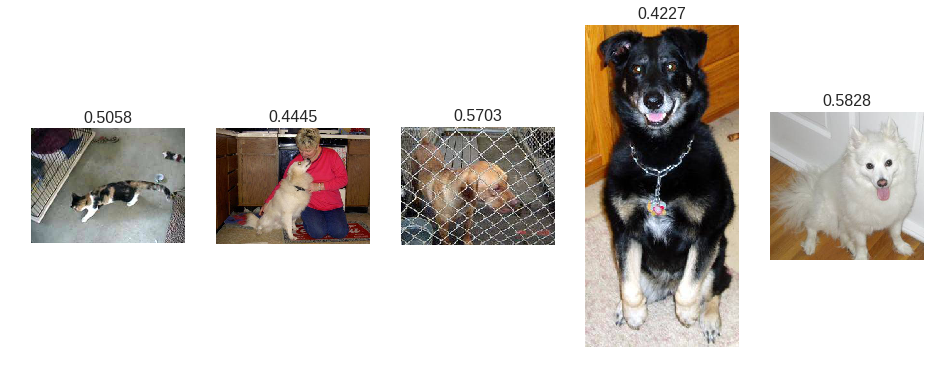

In [73]:
# most uncertain
most_uncertain = np.argsort(np.abs(probs -0.5))[:5]

plot_val_with_title(most_uncertain, "Most uncertain predictions")

# Choosing a Learning Rate

The learning rate determines how quickly you want to update the weights (or parameters). Learning rate is one of the most difficult parameters to set, because it significantly affects model performance. 

The method learn.lr_find() helps you find an optimal learning rate. It uses the technique developed in the 2015 paper [Cyclical Learning Rates for Training Neural Networks](https://arxiv.org/abs/1506.01186), where we simply keep increase the learning rate from a very small value, until the loss starts decreasing. We can plot the learning rate across batches to see what this looks like. 

We first create a new learner, since we want to know how to set the learning rate for a new (untrained) model. 

In [0]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [75]:
# this trains the model, but it will stop if loss is getting worse
lrf = learn.lr_find()

 82%|████████▏ | 295/360 [00:07<00:01, 44.64it/s, loss=0.436]


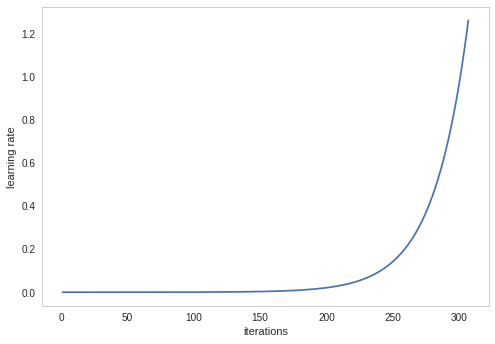

In [79]:
sns.set_style("whitegrid", {'axes.grid' : False})
learn.sched.plot_lr()

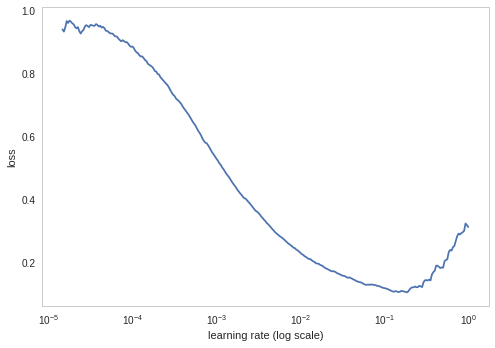

In [81]:
# plot of loss versus learning rate
learn.sched.plot()

In the chart above, we are looking for highest learning rate where it's still improving. Jeremy opines that this is 10^-2. 

At 10^-1, it's no longer improving and it starts to get worse. 

# Number of Epochs

Typically run it till the results start getting worse

# Useful Methods in fast.ai

One question mark (?) = read document
Two question marks (??) = read source code

In [0]:
# documentation
?np.exp

In [0]:
# source code
??learn.predict

# Fast.ai Deep Learning Lesson 2: Convolutional Neural Nets

[Link](https://course.fast.ai/lessons/lesson2.html)

# Learning Rate Finder

learn.sched.plot_lr()
learn.sched.plot()

In Python, scientific notation often written as:

0.1 --> 10^-1  --> 1e-1<br>
0.01 -->10^-2 --> 1e-2


# Data Augmentation

If you try training for more epochs, you'll notice that we start to overfit which means thta our model is learning to recognize the specific images in the training set, rather than generalizing such that we also get good results on the validation set. One way to fix this is to effecitvely create more data, through data augmentation. This refers to randomly changing the images in ways that shouldn't impact their interpretation, such as horizontal flipping, zooming, and rotating. 

We can do this by passing aug_tfms (augmentation transforms) to tfms_from_model, with a list of functions to apply that randomly change the image however we wish. For photos that are largerly taken from the side, we can use the pre-defined list of functiosn transforms_side_on. We can also specify random zooming of images up to specified scale by adding the max_zoom parameter. 

In [0]:
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [0]:
def get_augs():
  data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1)
  x,_ = next(iter(data.aug_dl))
  return data.trn_ds.denorm(x)[1]

In [0]:
ims = np.stack([get_augs() for i in range(6)])

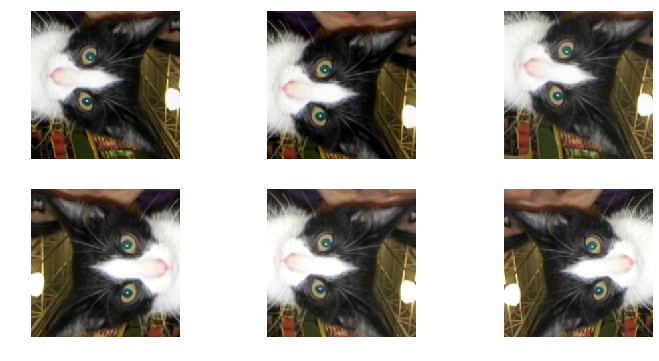

In [89]:
plots(ims, rows=2)

In [0]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [92]:
learn.fit(1e-2, 1)

epoch      trn_loss   val_loss   accuracy   
    0      0.048055   0.028381   0.9895    



[array([0.0284]), 0.9895]

### Data Augmentation Doesn't Work with Precompute

Switch to False

In [0]:
learn.precompute=False

In [94]:
learn.fit(1e-2, 3, cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      0.051489   0.02928    0.988     
    1      0.046214   0.027343   0.9875    
    2      0.047154   0.026637   0.9885    



[array([0.0266]), 0.9885]

### Overfitting

Training loss much lower than validation loss

### Stochastic Gradient Descent with Restarts

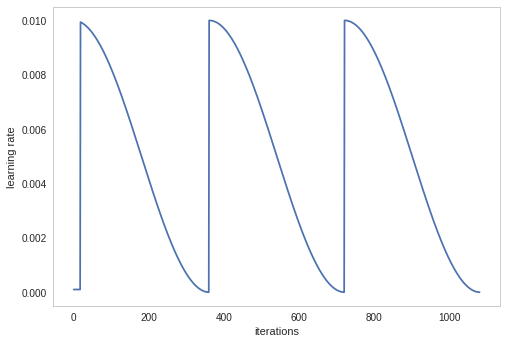

In [96]:
learn.sched.plot_lr()

# Save Model

Once we got a pretty good model, save it so we can load it again later without training from scratch.

learn.save is creating a temporary file ("tmp" folder) with all precomputed activations in that folder. If there are weird errors, might be some precomputed activations. You can delete "tmp" directory to see if that fixes it. 

In [0]:
learn.save('224_lastlayer')

In [0]:
learn.load('224_lastlayer')

In [101]:
# load tmp folder
!ls {PATH}tmp

x_act_resnet34_0_224.bc       x_act_val_resnet34_0_224.bc
x_act_test_resnet34_0_224.bc


In [0]:
# to delete tmp
# !rm -rf {PATH}tmp

# Fine-Tuning & Differential Learning Rate Annealing

Once we have a good final layer trained, we can try fine-tuning the other layers. We need to tell the learner that we weant to unfreeze the reamining layers by using unfreeze().

In [0]:
learn.unfreeze()

Note that other layers have already been trained to recognize imagenet photos (whereas our final layers were randomly initialized), so we want to be careful of not destroying the carefully tuned weights that are already there. 

Generally speaking, the earlier layers (as we've seen) have more general purpose features. Therefore, we would expect them to need less fine-tuning for new datasets. For this reason, we will use different learning rates for different layers; the first few layers will be at 1e-4, the middle layers at 1e-3, and our FC layers we'll leave at 1e-2 as before. We refer to this as "differential learning rates", although there's no standard name for this technique in the literature that we're aware of. 

These differential learning rates can take a pretty good model and turn it into an even better one.

In [0]:
lr=np.array([1e-4, 1e-3, 1e-2])

In [105]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy   
    0      0.049443   0.025914   0.9915    
    1      0.044919   0.024052   0.9905    
    2      0.029826   0.022345   0.9885    
    3      0.041756   0.02386    0.9905    
    4      0.022366   0.020684   0.9895    
    5      0.022174   0.020056   0.99      
    6      0.019294   0.019859   0.9895    



[array([0.0199]), 0.9895]

Another trick we've used is adding the cycle_mult parameter. 

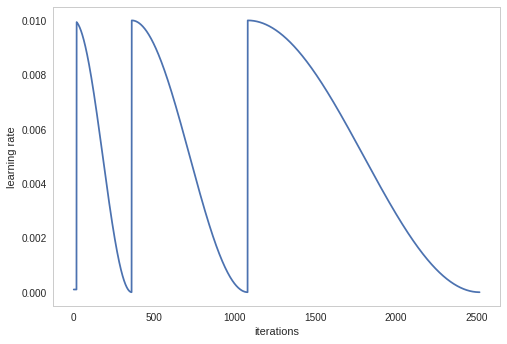

In [107]:
learn.sched.plot_lr()

# Test Time Augmentation

TTA simply makes predictiions not just on the images in your validation set, but also makes predictions on a number of randomly augmented versions of them too (by defeault it uses the original image along with 4 randomly augmented versions). It then takes the average prediction from these images, and uses that. To use TTA on the validation set, we can use the learn's TTA() method. 

In [0]:
learn.save('224_all')

In [0]:
learn.load('224_all')

In [0]:
# I'm getting an error running the accuracy method; TTA() is creating some sort of 'extra dimension' issue; haven't figured out yet
# log_preds,y = learn.TTA()
# accuracy(log_preds,y)

In [140]:
log_preds_2, y_2 = learn.TTA()
print(log_preds_2.shape)

(5, 2000, 2)


In [144]:
log_preds_2[1].shape

(2000, 2)

In [146]:
y_2.shape

(2000,)

Generally see about a 10% - 20% reduction in error on this dataset when using TTA at this point

# Analyzing Results

### Confusion Matrix

In [136]:
preds = np.argmax(log_preds, axis=1)
print(preds.shape)

(2000,)


In [137]:
probs = np.exp(log_preds[:,1])
print(probs.shape)

(2000,)


In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

[[990  10]
 [ 11 989]]


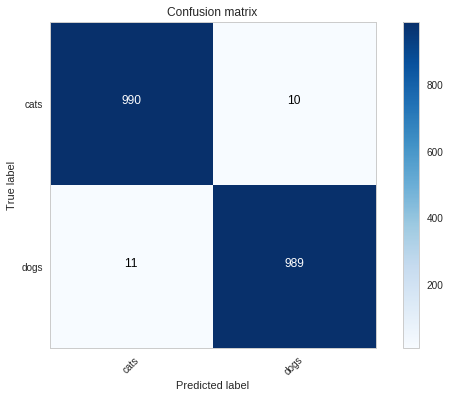

In [139]:
plot_confusion_matrix(cm, data.classes)

# Review: Easy Steps to Train a World-Class Image Classifier

1. Enable data augmentation and precompute=True
2. Use lr_find() to find highest learning rate where loss is still clearly improving
3. Train last layer from precomputed activations for 1-2 epochs
4. Train last layer with data augmentation (i.e. precompute=False) for 2-3 epochs with cycle_len=1
5. Unfreeze all layers
6. Set earlier layers to 3x - 10x lower learning rate than next higher layer
7. Use lr_find() again
8. Train full network with cycle_mult=2 until over-fitting